In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), '..'))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = os.path.join(lib_path, 'figures', '/rapports/abstract_TI2022/latex_template/')
save_fig = False

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc('figure', figsize=(10,5))
rc('figure', dpi=100)
rc('font', size=18)
rc('legend', fontsize=16)

In [3]:
n_lim = 10**8
t_fin_lim = 2.

In [4]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                  lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                  alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop, cfl=1., fo=1.)
num_prop_weno_upwind = NumericalProperties(dx=3.9*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop, cfl=1., fo=1.)
num_prop_ref = NumericalProperties(dx=3.*10**-5, schema='weno', time_scheme='rk4', phy_prop=phy_prop, cfl=1., fo=1.)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.005)

In [7]:
lda_rapp = 5.5*10**-2/15.5
rhocp_rapp = 70278/702780.
print(lda_rapp, rhocp_rapp)

0.0035483870967741938 0.1


# Test des différents opérateurs en WENO pour la temperature

<IPython.core.display.Javascript object>


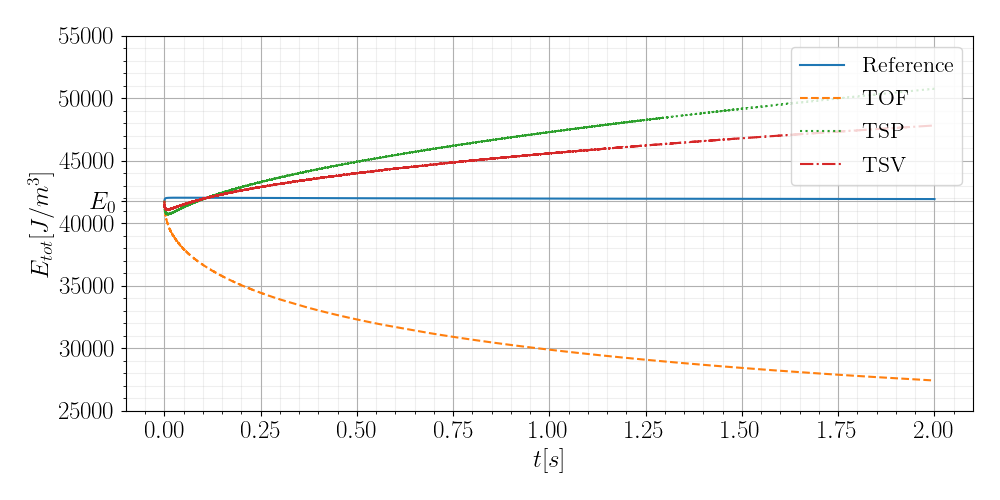

dt fourier
4.0888316389624144e-06
Reference


<IPython.core.display.Javascript object>


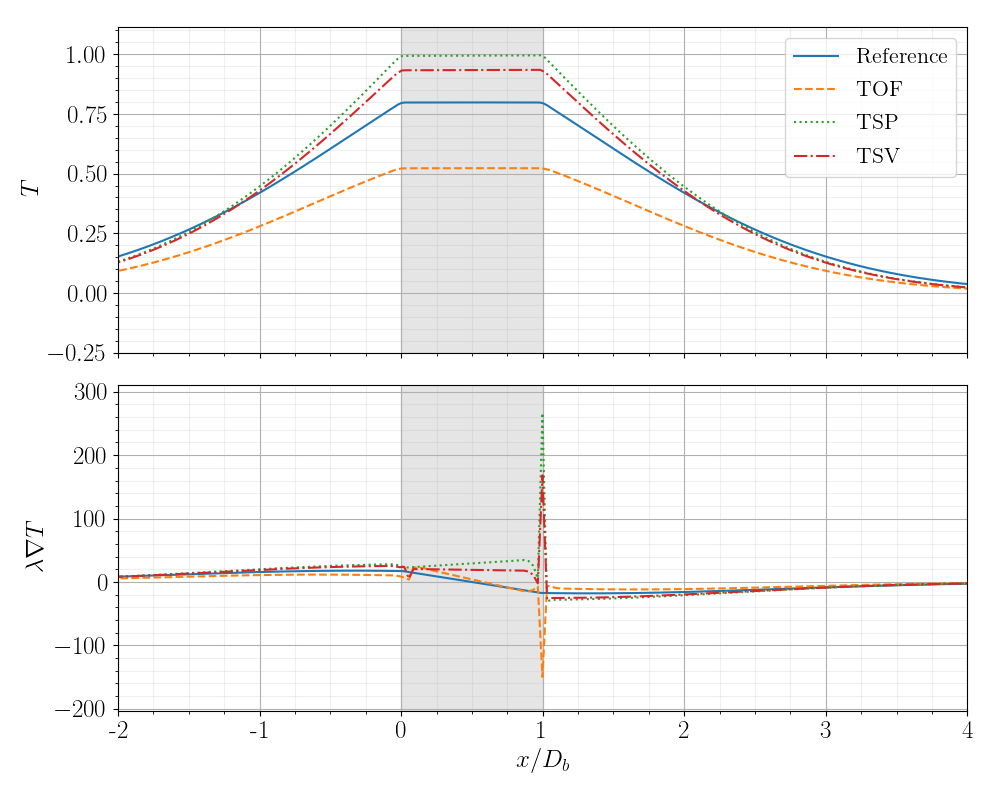

<IPython.core.display.Javascript object>


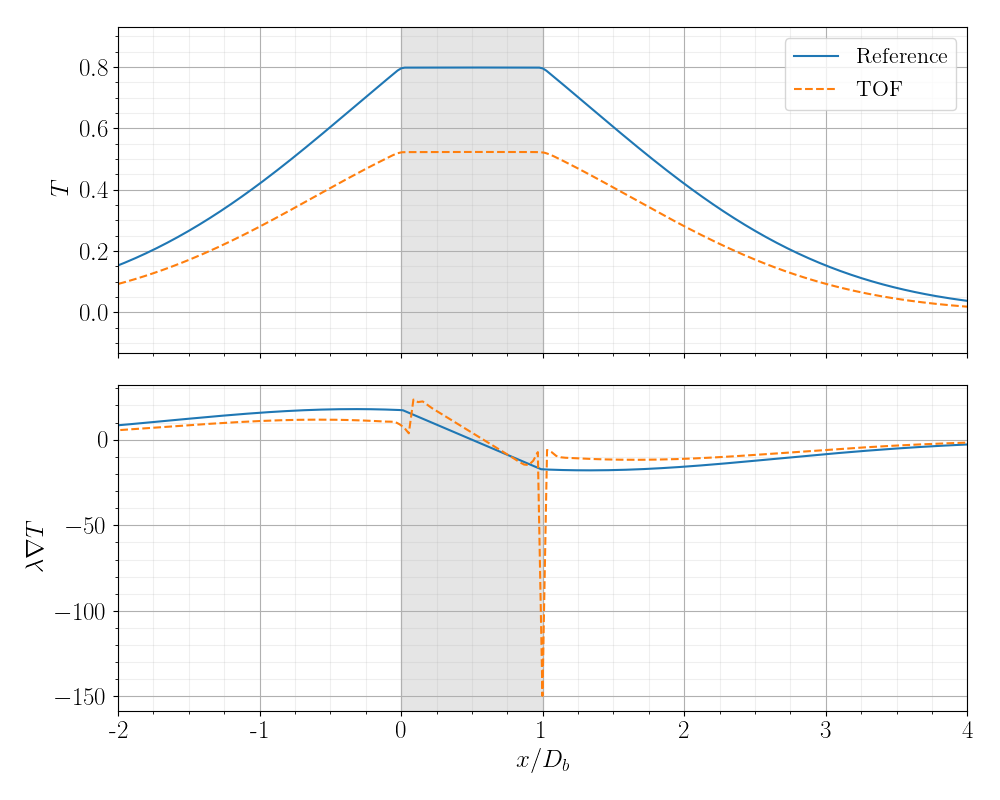

<IPython.core.display.Javascript object>


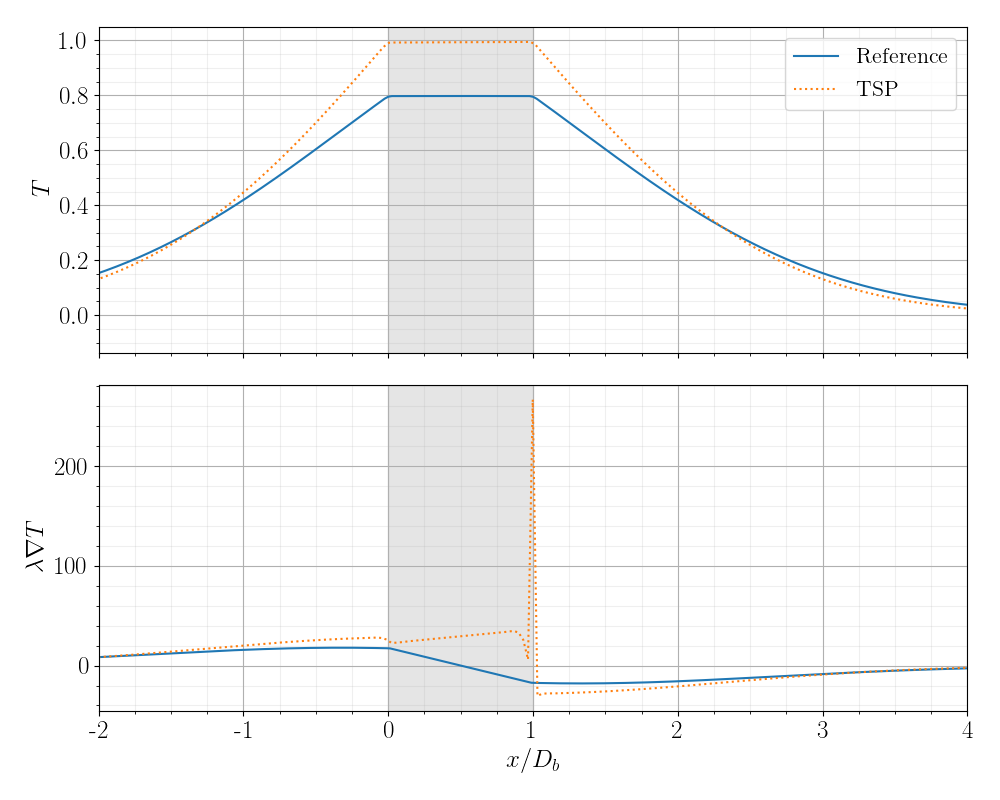

<IPython.core.display.Javascript object>


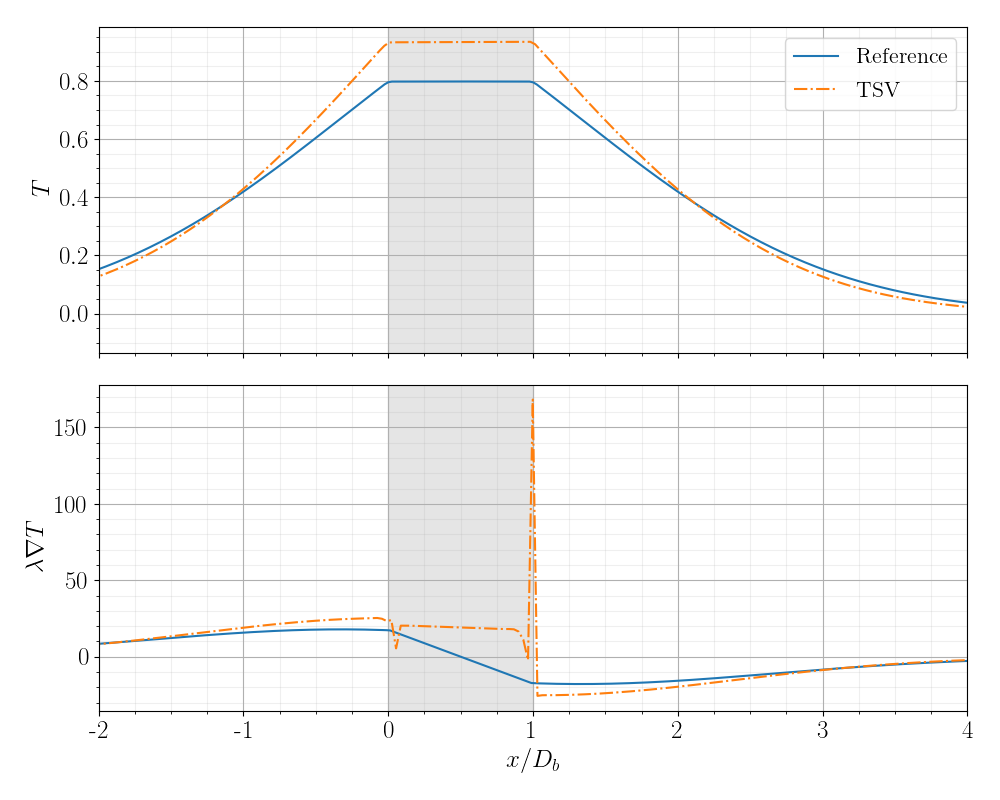

dE*/dt* ref = -4.47377e-09
dt fourier
6.918433404737903e-06
TOF
dE*/dt* = -4.81915e-07
dt fourier
6.918433404737903e-06
Ti
TSP
dE*/dt* = 6.14944e-07
dt fourier
6.918433404737903e-06
Ti
TSV 
dE*/dt* = 4.00072e-07


In [5]:
t_fin = 2.
plot = Plotter('decale', lda_gradT=True, markers=False, time=False, zoom=(-2,4), figsize=(10,8))
plot0 = Plotter('decale', lda_gradT=True, markers=False, time=False, zoom=(-2,4), figsize=(10,8))
fig1,ax1 = plt.subplots(1)
# ax1.set_title('Énergie en fonction du temps')
ax1.set_xlabel(r'$t [s]$')
ax1.set_ylabel(r'$E_{tot} [J/m^3]$')

print('==========================')
prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop_ref, name='Reference')
E1 = prob_ref.energy
print(prob_ref.name)
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0], ls='-')
l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)

n = len(e_ref)
i0 = int(n/5)
dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim)

print('==========================')
prob0 = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob0.energy
print(prob0.name)
t, e = prob0.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0], ls='--')
dedt_adim_ref = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim_ref)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob0.name, ls='--')

# Modif plot énergie 

ax1.minorticks_on()
ax1.grid(b=True, which='major')
ax1.grid(b=True, which='minor', alpha=0.2)
# le = fig1.legend()

fig1.canvas.draw()
labels = [item.get_text() for item in ax1.get_yticklabels()]
ticks = list(ax1.get_yticks())
ticks.append(E0/(0.02*0.005**2))
labels.append(r'$E_0$')

ticks = ax1.set_yticks(ticks)
ticklab = ax1.set_yticklabels(labels)

# handles, labels = ax1.get_legend_handles_labels()
# labels[0] = 'TC, ' + labels[0]
# labels[1] = 'TC, ' + labels[1]
# ax1.legend(handles, labels)
ax1.legend()
fig1.tight_layout()
# if save_fig:
#     fig1.savefig(savefig_path + 'energie_synthese_form_temp.pdf')

# Modif plot température

# handles, labels = plot.ax.get_legend_handles_labels()
# labels[0] = 'TC, ' + labels[0]
# labels[1] = 'TC, ' + labels[1]
# plot.ax.legend(handles, labels, loc='upper right')
# plot.ax.set_xlabel(r'$x [m]$')
# plot.ax.set_ylabel(r'$T [^{\circ} C]$')
# plot.ax.set_xlim(-0.001, 0.0075)
# from tikzplotlib import save
# save(savefig_path + 'temperature.tikz', plot.fig)
# save(savefig_path + 'conservation_energie.tigz', plot4.fig)
# if save_fig:
#     plot.fig.savefig(savefig_path + 'temperature_comparaison_euler_weno_form_temp.pdf')
#     plot4.fig.savefig(savefig_path + 'conservation_energie_comparaison_euler_quick.pdf')


# Comparaison des formulations en WENO pour l'énergie

<IPython.core.display.Javascript object>


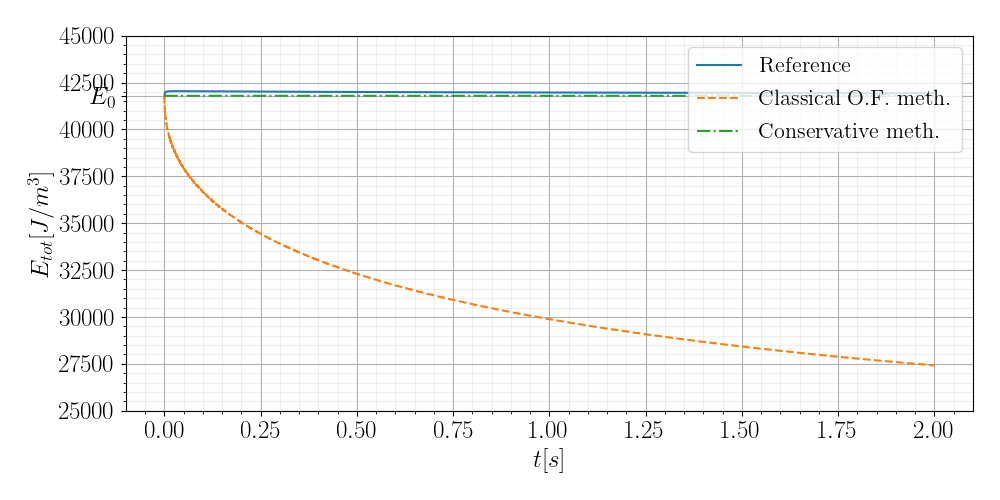

dt fourier
4.0888316389624144e-06
Reference


<IPython.core.display.Javascript object>


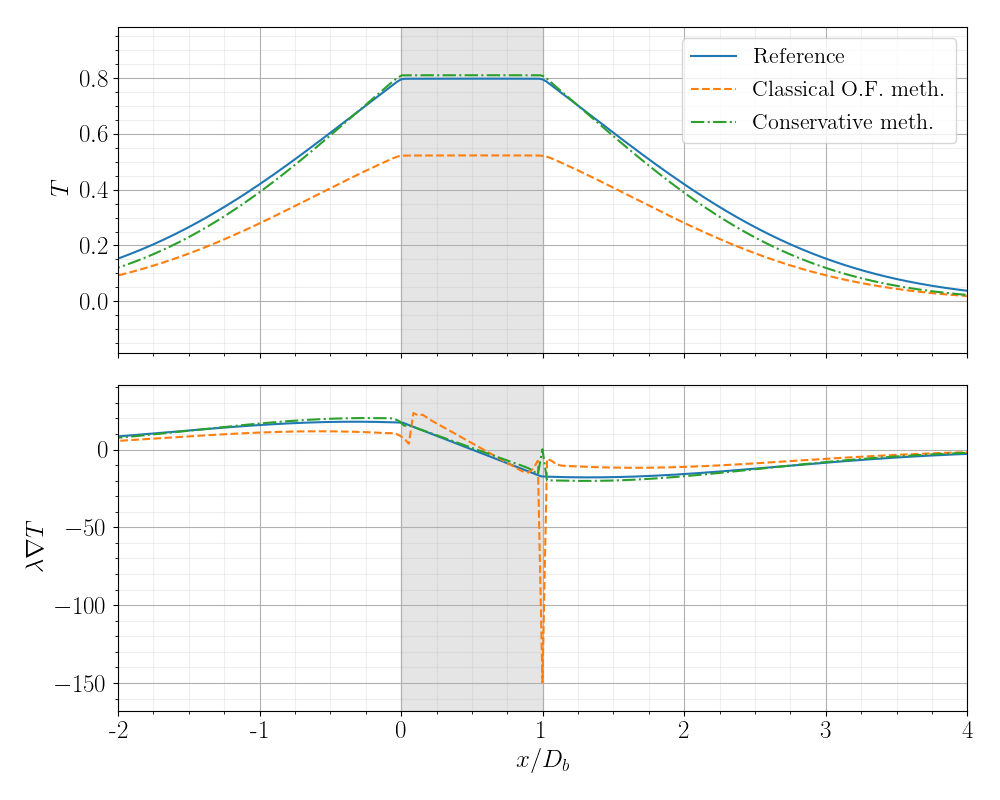

<IPython.core.display.Javascript object>


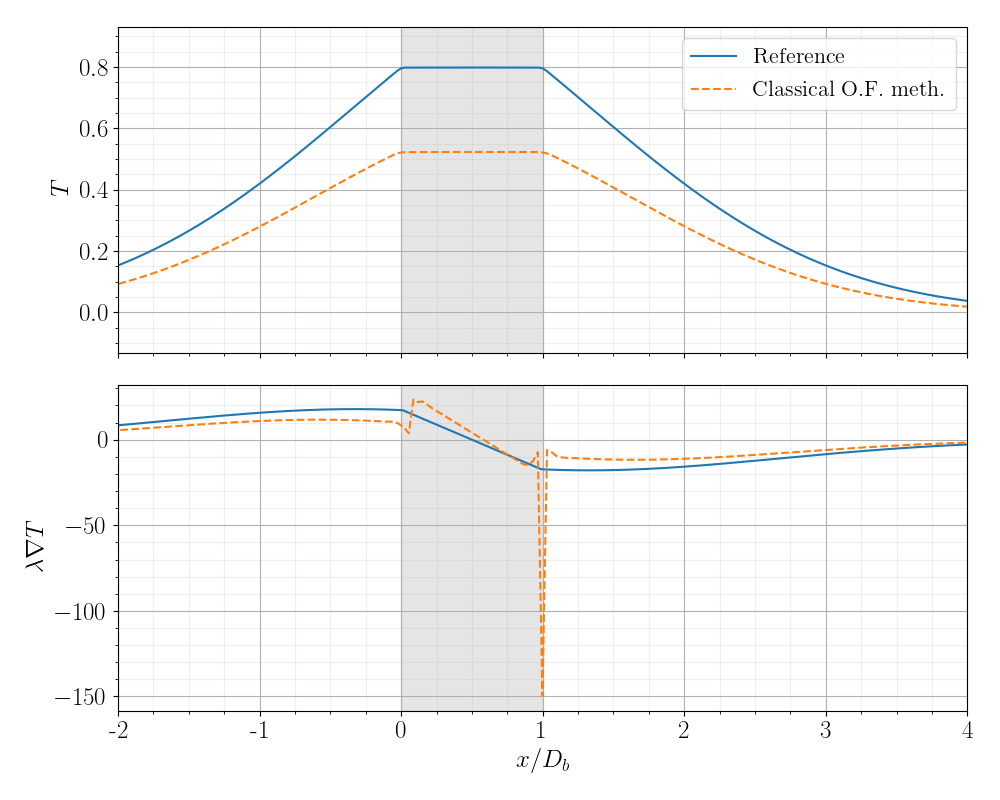

<IPython.core.display.Javascript object>


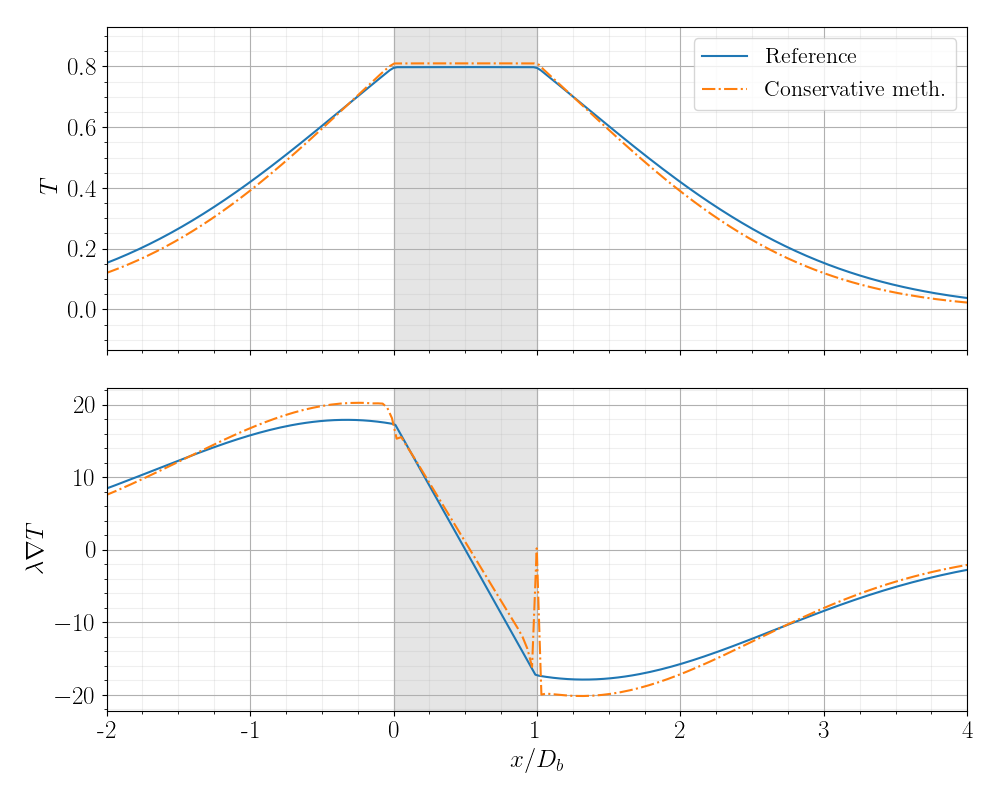

dE*/dt* ref = -4.47377e-09
dt fourier
6.918433404737903e-06
Classical O.F. meth.
dE*/dt* = -4.81915e-07
dt fourier
6.918433404737903e-06
Ti
Conservative meth.
dE*/dt* = 5.20887e-21


In [5]:
t_fin = 2.
plot = Plotter('decale', lda_gradT=True, markers=False, time=False, zoom=(-2,4), figsize=(10,8))
plot0 = Plotter('decale', lda_gradT=True, markers=False, time=False, zoom=(-2,4), figsize=(10,8))
plot4 = Plotter('decale', lda_gradT=True, markers=False, time=False, zoom=(-2,4), figsize=(10,8))
# plot5 = Plotter('decale', lda_gradT=True, markers=False, time=False, zoom=(-2,4), figsize=(10,8))
# plot = Plotter('classic', lda_gradT=True, figsize=(10,8))
# plot0 = Plotter('classic', lda_gradT=True, figsize=(10,8))
# plot1 = Plotter('classic', lda_gradT=True, figsize=(10,8))
# plot4 = Plotter('classic', lda_gradT=True, figsize=(10,8))
# plot5 = Plotter('classic', lda_gradT=True, figsize=(10,8))
fig1,ax1 = plt.subplots(1)
# ax1.set_title('Énergie en fonction du temps')
ax1.set_xlabel(r'$t [s]$')
ax1.set_ylabel(r'$E_{tot} [J/m^3]$')

print('==========================')
prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop_ref, name='Reference')
E1 = prob_ref.energy
print(prob_ref.name)
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0, plot4])
l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)

n = len(e_ref)
i0 = int(n/5)
dedt_adim_ref = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim_ref)

print('==========================')
prob0 = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, name='Classical O.F. meth.')
E0 = prob0.energy
print(prob0.name)
t, e = prob0.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0], ls='--')
dedt_adim_ref = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim_ref)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob0.name, ls='--')

print('==========================')
prob4 = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', conv_interf='quick', name='Conservative meth.')
E0 = prob4.energy
print(prob4.name)
t, e = prob4.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4], ls='-.')

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4.name, ls='-.')

# Modif plot énergie 

ax1.minorticks_on()
ax1.grid(b=True, which='major')
ax1.grid(b=True, which='minor', alpha=0.2)
# le = fig1.legend()

fig1.canvas.draw()
labels = [item.get_text() for item in ax1.get_yticklabels()]
ticks = list(ax1.get_yticks())
ticks.append(E0/(0.02*0.005**2))
labels.append(r'$E_0$')

ticks = ax1.set_yticks(ticks)
ticklab = ax1.set_yticklabels(labels)

# handles, labels = ax1.get_legend_handles_labels()
ax1.legend()
fig1.tight_layout()
if save_fig:
    fig1.savefig(savefig_path + 'energie_synthese_form_ener.pdf')

# Modif plot température

# handles, labels = plot.ax.get_legend_handles_labels()
# labels[0] = 'Reference'
# plot.ax.legend(handles, labels)
# plot.ax.set_xlabel(r'$x [m]$')
# plot.ax.set_ylabel(r'$T [^{\circ} C]$')
# plot.ax.set_xlim(-0.001, 0.0075)
# from tikzplotlib import save
# save(savefig_path + 'temperature.tikz', plot.fig)
# save(savefig_path + 'conservation_energie.tigz', plot4.fig)
if save_fig:
    plot.fig.savefig(savefig_path + 'temperature_comparaison_euler_weno_form_ener.pdf')
#     plot4.fig.savefig(savefig_path + 'conservation_energie_comparaison_euler_quick.pdf')
